In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets

df_fare = pd.read_csv('UPDATEDitineries-airportCodes3.csv', low_memory=False)
#print(df_fare.head())

from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

In [2]:
#Remove columns without continuous numbers

df_fare = df_fare.select_dtypes(include='number')
#print(df_fare.head())
print(df_fare.columns)

Index(['Unnamed: 0', 'elapsedDays', 'baseFare', 'totalFare', 'seatsRemaining',
       'totalTravelDistance', 'startingAirportDistance',
       'destinationAirportDistance', 'minutes', 'segmentsDistance1',
       'segmentsDistance2', 'segmentsDistance3', 'segmentsDistance4',
       'segmentsDurationInSeconds1', 'segmentsDurationInSeconds2',
       'segmentsDurationInSeconds3', 'segmentsDurationInSeconds4',
       'segmentsEpochTimeInSeconds1', 'segmentsEpochTimeInSeconds2',
       'segmentsEpochTimeInSeconds3', 'segmentsEpochTimeInSeconds4',
       'startingCoordinates1', 'startingCoordinates2', 'startingCoordinates3',
       'startingCoordinates4', 'startingCoordinates5', 'startingCoordinates6',
       'segment1Coordinates1', 'segment1Coordinates2', 'segment1Coordinates3',
       'segment1Coordinates4', 'segment1Coordinates5', 'segment1Coordinates6',
       'segment1Distance', 'segment2Coordinates1', 'segment2Coordinates2',
       'segment2Coordinates3', 'segment2Coordinates4', 'segmen

In [3]:
#bin the df due to its size
bin_size = 75
df_fare_binned = df_fare.median().to_frame().transpose()  # Compute median of each column
df_fare_binned = df_fare.groupby(pd.cut(df_fare.index, bins=range(0, len(df_fare.index), bin_size))).median()  # Bin the data and compute median of each bin

#print(df_fare_binned.head())
print(len(df_fare_binned))

597


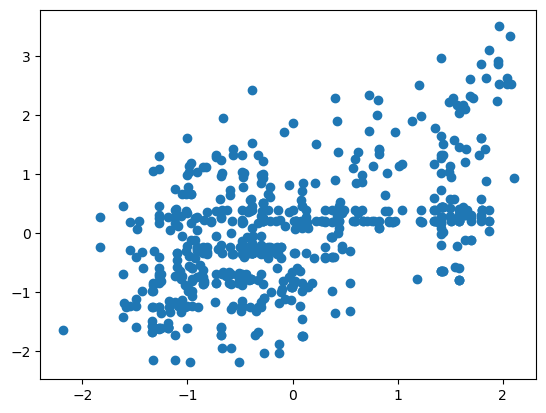

In [4]:
#HCA with totalTravelDistance and totalFare

df_fare_2 = df_fare_binned[['totalTravelDistance','totalFare']]
df_fare_2_nm = StandardScaler().fit_transform(df_fare_2)

plt.scatter(df_fare_2_nm[:,0], df_fare_2_nm[:, 1])

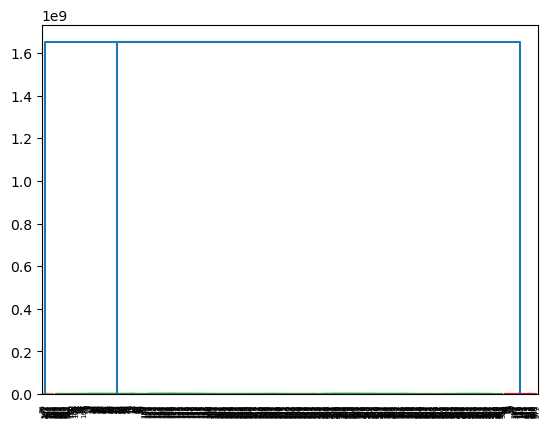

In [5]:
# create a dendrogram
clust = linkage(df_fare_binned)
dendrogram(clust)
plt.show()

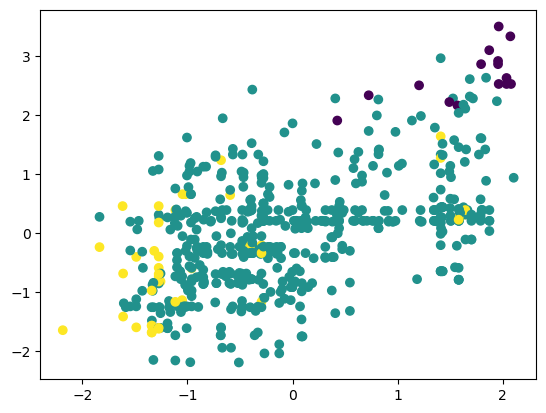

In [6]:
from scipy.cluster.hierarchy import fcluster

# use fcluster to visualize the clusters better
fclust = fcluster(clust, 3, criterion = "maxclust")
plt.scatter(df_fare_2_nm[:, 0], df_fare_2_nm[:, 1], c=fclust)

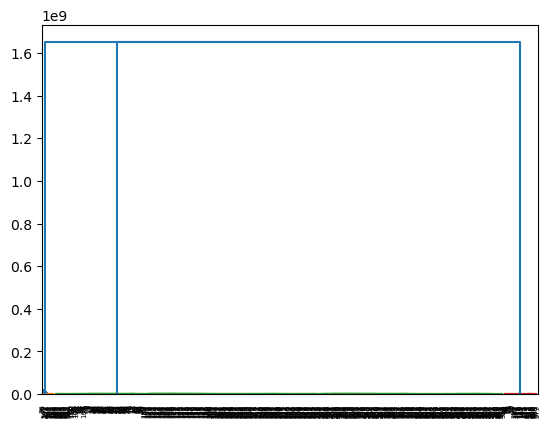

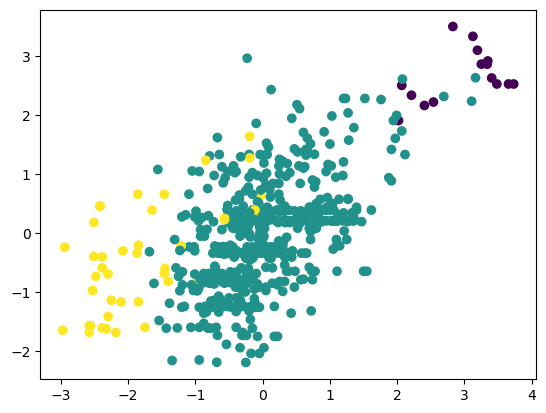

In [7]:
#HCA with minutes and totalFare

df_fare_3 = df_fare_binned[['minutes','totalFare']]
df_fare_3_nm = StandardScaler().fit_transform(df_fare_3)

plt.scatter(df_fare_3_nm[:,0], df_fare_3_nm[:, 1])

# create a dendrogram
clust = linkage(df_fare_binned)
dendrogram(clust)
plt.show()

from scipy.cluster.hierarchy import fcluster

# use fcluster to visualize the clusters better
fclust = fcluster(clust, 3, criterion = "maxclust")
plt.scatter(df_fare_3_nm[:, 0], df_fare_3_nm[:, 1], c=fclust)

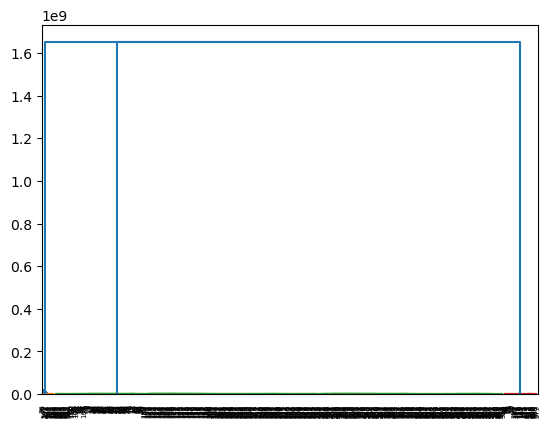

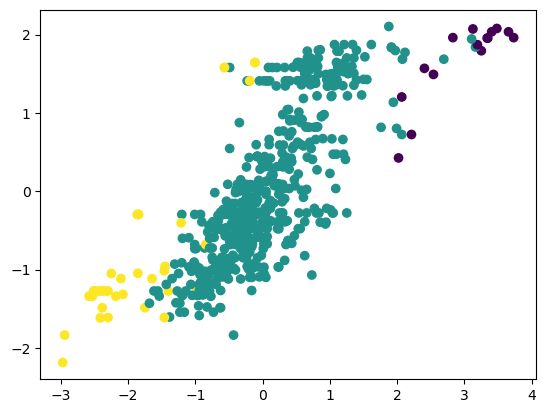

In [8]:
#HCA with minutes and totalTravelDistance

df_fare_4 = df_fare_binned[['minutes','totalTravelDistance']]
df_fare_4_nm = StandardScaler().fit_transform(df_fare_4)

plt.scatter(df_fare_4_nm[:,0], df_fare_4_nm[:, 1])

# create a dendrogram
clust = linkage(df_fare_binned)
dendrogram(clust)
plt.show()

from scipy.cluster.hierarchy import fcluster

# use fcluster to visualize the clusters better
fclust = fcluster(clust, 3, criterion = "maxclust")
plt.scatter(df_fare_4_nm[:, 0], df_fare_4_nm[:, 1], c=fclust)

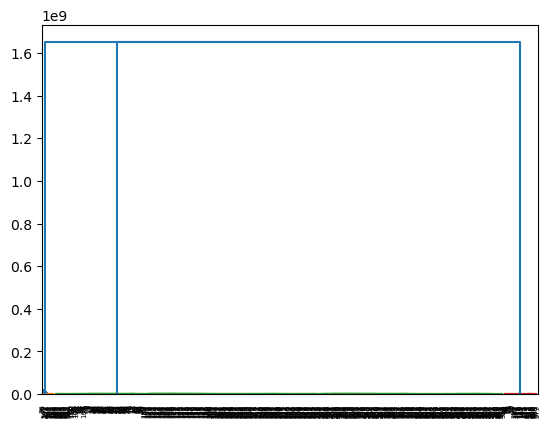

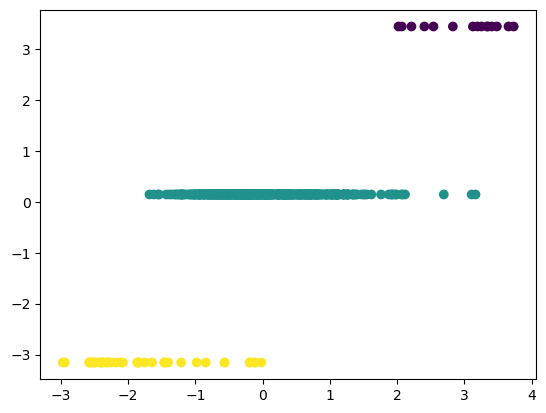

In [9]:
#HCA with totalTravelDistance and connections

df_fare_5 = df_fare_binned[['minutes','connections']]
df_fare_5_nm = StandardScaler().fit_transform(df_fare_5)

plt.scatter(df_fare_5_nm[:,0], df_fare_5_nm[:, 1])

# create a dendrogram
clust = linkage(df_fare_binned)
dendrogram(clust)
plt.show()

from scipy.cluster.hierarchy import fcluster

# use fcluster to visualize the clusters better
fclust = fcluster(clust, 3, criterion = "maxclust")
plt.scatter(df_fare_5_nm[:, 0], df_fare_5_nm[:, 1], c=fclust)